In [1]:
import alphalens as al
import numpy as np
import pandas as pd
import pytz
from rqdata_utils import *
%matplotlib inline

In [2]:
price_df,instrument_df,equity_df = get_price_instrument_equity("cn_stock_price_2012_2018.csv","cn_instrument_info_2012_2018.csv","cn_equity_daily_2012_2018.csv","sectorCode")

In [3]:
price_df.head()

,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,601933.XSHG,601939.XSHG,601958.XSHG,601988.XSHG,601989.XSHG,601991.XSHG,601992.XSHG,601996.XSHG,601998.XSHG,601999.XSHG
date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,5.1224,6.0525,7.91,3.86,2.6766,4.6067,0.7598,5.3434,3.6575,5.6769,...,3.4448,3.2267,10.5774,2.1023,4.8762,4.5951,3.8201,1.9981,3.2551,7.3631
2012-01-05,5.2001,5.9865,7.33,3.86,2.6436,4.3733,0.7288,5.0471,3.6575,5.1148,...,3.4252,3.2841,10.2213,2.1384,4.6739,4.5426,3.6308,1.8740,3.3448,7.1971
2012-01-06,5.1866,5.9122,7.36,3.86,2.6370,4.2467,0.7334,5.3487,3.6575,5.2366,...,3.3884,3.3343,10.3368,2.1384,4.5871,4.6213,3.7633,1.9145,3.3856,7.3045
2012-01-09,5.3319,6.1186,7.70,3.86,2.7096,4.4133,0.7702,5.8830,3.6575,5.4708,...,3.4517,3.3988,10.8950,2.1528,4.7606,4.6563,3.9716,2.0124,3.4346,7.6170
2012-01-10,5.3319,6.2177,8.16,3.86,2.8085,4.5200,0.8092,6.1317,3.6575,5.7144,...,3.6438,3.4275,11.9826,2.1600,5.0112,4.6126,4.2272,2.2129,3.4835,7.9099


In [4]:
instrument_df.head()

,abbrevSymbol,exchange,industryCode,industryName,sectorCode,sectorName,shenwanIndustryCode,shenwanIndustryName
bookId,,,,,,,,
000001.XSHE,PAYH,XSHE,J66,货币金融服务,Financials,金融,801780.INDX,银行
000002.XSHE,WKA,XSHE,K70,房地产业,Financials,金融,801180.INDX,房地产
000004.XSHE,GNKJ,XSHE,C27,医药制造业,HealthCare,医疗保健,801150.INDX,医药生物
000005.XSHE,SJXY,XSHE,N77,生态保护和环境治理业,Industrials,工业,801160.INDX,公用事业
000006.XSHE,SZYA,XSHE,K70,房地产业,Financials,金融,801180.INDX,房地产


In [5]:
equity_df.head()

return   close  total_turnover      volume  \
date       order_book_id                                                 
2012-01-04 000001.XSHE   -0.027582  5.1224    2.275637e+08  40894428.0   
           000002.XSHE   -0.018742  6.0525    3.559891e+08  47432958.0   
           000004.XSHE   -0.022250  7.9100    3.763833e+06    465469.0   
           000005.XSHE    0.000000  3.8600    0.000000e+00         0.0   
           000006.XSHE   -0.009756  2.6766    7.619286e+06   2513811.0   

                            week   month report_quarter    market_cap  \
date       order_book_id                                                
2012-01-04 000001.XSHE    0.5775  0.4331            NaN           NaN   
           000002.XSHE    0.3711  0.4030         2011q3  8.059489e+10   
           000004.XSHE    0.5720  0.7506         2011q3  6.642556e+08   
           000005.XSHE    0.0000  0.0000         2011q3  3.529328e+09   
           000006.XSHE    0.1416  0.1667         2011q3  4.015370e+09   

                          a_share_market_val_2  \
date       order_book_id                         
2012-01-04 000001.XSHE                     NaN   
           000002.XSHE            7.082120e+10   
           000004.XSHE            6.634549e+08   
           000005.XSHE            3.527048e+09   
           000006.XSHE            3.929464e+09   

                          cash_received_from_sales_of_goods  pb_ratio  \
date       order_book_id                                                
2012-01-04 000001.XSHE                                  NaN       NaN   
           000002.XSHE                         7.516785e+10    1.5216   
           000004.XSHE                         5.949968e+07    8.8175   
           000005.XSHE                         2.565851e+07    5.3480   
           000006.XSHE                         2.531436e+09    1.4348   

                            net_profit  ps_ratio   sectorCode  
date       order_book_id                                       
2012-01-04 000001.XSHE             NaN       NaN   Financials  
           000002.XSHE    4.106349e+09    0.8679   Financials  
           000004.XSHE    4.500363e+06   37.5796   HealthCare  
           000005.XSHE    1.365665e+07 -347.2191  Industrials  
           000006.XSHE    2.763917e+08    1.4139   Financials

In [6]:
# sectorCodeSeries = instrument_df.sectorCode
# bookIdIdx = cn_df.index.get_level_values('order_book_id')
# bookIdArray = bookIdIdx.get_values()
# sectorInfo = sectorCodeSeries[bookIdArray[:]].values
# cn_df['sector'] = sectorInfo
# cn_df.head()
# sectorCodeFromBookId = lambda x: try(sectorCodeSeries[x]
# vSectorCodeFromBookId = np.vectorize(sectorCodeFromBookId)
# bookIdIdx = cn_df.index.get_level_values('order_book_id')
# bookIdArray = bookIdIdx.get_values()
# vSectorCodeFromBookId(bookIdArray)

In [7]:
# bookIdIdx = cn_df.index.get_level_values('order_book_id')
# for index,row in cn_df.iterrows():
#     print(instrument_df.loc[index,'sectorCode'])
#     break

In [8]:
# orderId = cn_df.index.get_level_values('order_book_id')
# sector = []
# total_dates = len(dates)
# for counter, date in enumerate(dates):
#     if(counter%100000==0):
#         print("date: {} | percentage: {}%".format(date,counter/total_dates*100))
#     sector.append(timezone.localize(date))
# aware
# cn_df.date = aware
# cn_df.set_index(['date','order_book_id'],drop=True,inplace=True)
# cn_df.drop(["Unnamed: 0"],axis=1,inplace=True)
# cn_df.head()

In [9]:
# cn_df.index.levels[1]

In [10]:
# cn_df = pd.read_csv("cn_equity_daily_2012_2018.csv")
# cn_df.date = pd.to_datetime(cn_df.date,format="%Y-%m-%d",errors='ignore')
# dates = cn_df.date
# aware = []
# total_dates = len(dates)
# for counter, date in enumerate(dates):
#     if(counter%100000==0):
#         print("date: {} | percentage: {}%".format(date,counter/total_dates*100))
#     aware.append(timezone.localize(date))
# aware
# cn_df.date = aware
# cn_df.set_index(['date','order_book_id'],drop=True,inplace=True)
# cn_df.drop(["Unnamed: 0"],axis=1,inplace=True)
# cn_df.head()

In [11]:
# map from order_book_id to sector


In [12]:
my_factor = equity_df['market_cap']
sectors = equity_df['sectorCode']
my_factor = my_factor.sortlevel()
sectors = sectors.sortlevel()
print(my_factor.head())
print(sectors.head())

date        order_book_id
2012-01-04  000001.XSHE               NaN
            000002.XSHE      8.059489e+10
            000004.XSHE      6.642556e+08
            000005.XSHE      3.529328e+09
            000006.XSHE      4.015370e+09
Name: market_cap, dtype: float64
date        order_book_id
2012-01-04  000001.XSHE       Financials
            000002.XSHE       Financials
            000004.XSHE       HealthCare
            000005.XSHE      Industrials
            000006.XSHE       Financials
Name: sectorCode, dtype: object


In [13]:
# Test
idx = pd.IndexSlice
price_df_test = price_df.iloc[:,1:1000]
universe_test = price_df_test.columns.values.tolist()
my_factor_test = my_factor.loc[idx[:,universe_test]]
sectors_test = sectors.loc[idx[:,universe_test]]

In [14]:
factor_data = al.utils.get_clean_factor_and_forward_returns(factor=my_factor_test,
                                                            prices=price_df_test,
                                                            groupby=sectors_test,
#                                                             groupby_labels=MORNINGSTAR_SECTOR_CODES,
                                                            periods=(1,5,10),
                                                            max_loss=1
                                                           )

Dropped 52.3% entries from factor data: 52.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!


In [15]:
factor_data.head()

1D        5D       15D        factor  \
date       asset                                                     
2012-01-04 000002.XSHE -0.010905  0.017745  0.024568  8.059489e+10   
           000004.XSHE -0.073325  0.021492  0.022756  6.642556e+08   
           000005.XSHE  0.000000  0.000000  0.000000  3.529328e+09   
           000006.XSHE -0.012329  0.046813  0.066502  4.015370e+09   
           000007.XSHE -0.050665 -0.027503  0.041961  1.595971e+09   

                              group  factor_quantile  
date       asset                                      
2012-01-04 000002.XSHE   Financials                5  
           000004.XSHE   HealthCare                1  
           000005.XSHE  Industrials                3  
           000006.XSHE   Financials                4  
           000007.XSHE   Financials                1

Returns Analysis


,1D,5D,15D
Ann. alpha,-0.106,-0.100,-0.064
beta,-0.048,-0.098,-0.116
Mean Period Wise Return Top Quantile (bps),-5.586,-6.202,-4.277
Mean Period Wise Return Bottom Quantile (bps),6.261,7.391,5.148
Mean Period Wise Spread (bps),-11.524,-13.248,-9.035


/home/jerryxyx/anaconda3/envs/py35/lib/python3.5/site-packages/pandas/tseries/index.py:814: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeIndex", PerformanceWarning)
/home/jerryxyx/anaconda3/envs/py35/lib/python3.5/site-packages/pandas/tseries/index.py:814: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeIndex", PerformanceWarning)


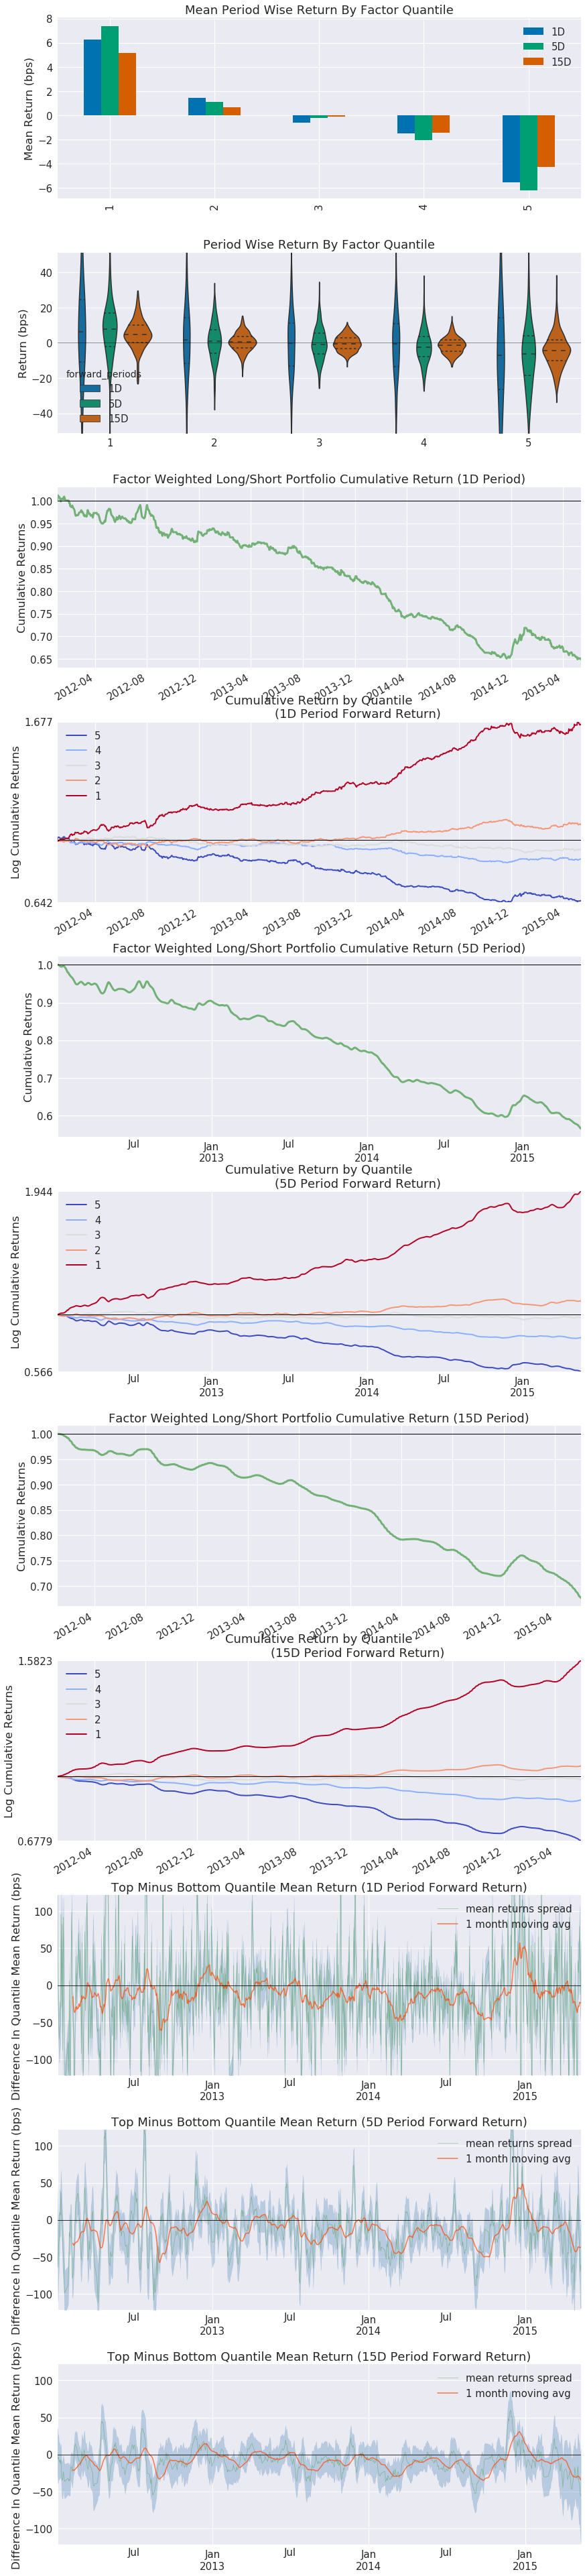

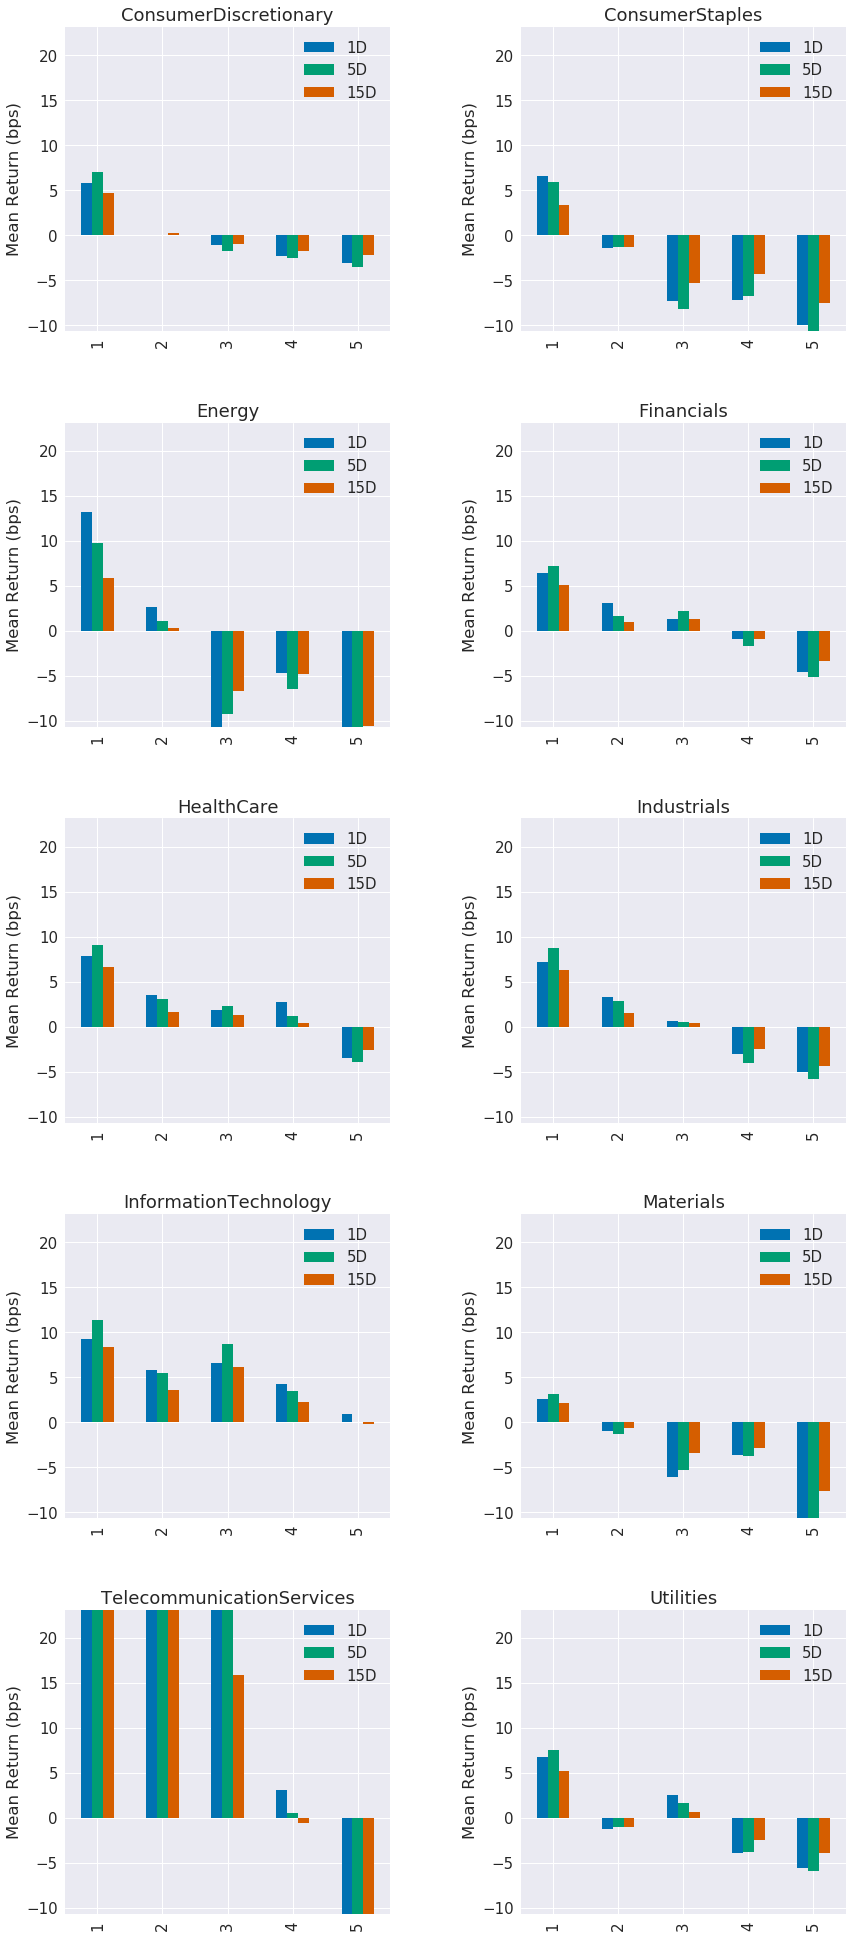

In [16]:
al.tears.create_returns_tear_sheet(factor_data,by_group=True)

Information Analysis


,1D,5D,15D
IC Mean,-0.023,-0.047,-0.065
IC Std.,0.105,0.129,0.138
Risk-Adjusted IC,-0.215,-0.366,-0.470
t-stat(IC),-6.122,-10.418,-13.383
p-value(IC),0.000,0.000,0.000
IC Skew,0.461,0.406,0.400
IC Kurtosis,1.135,0.693,0.821


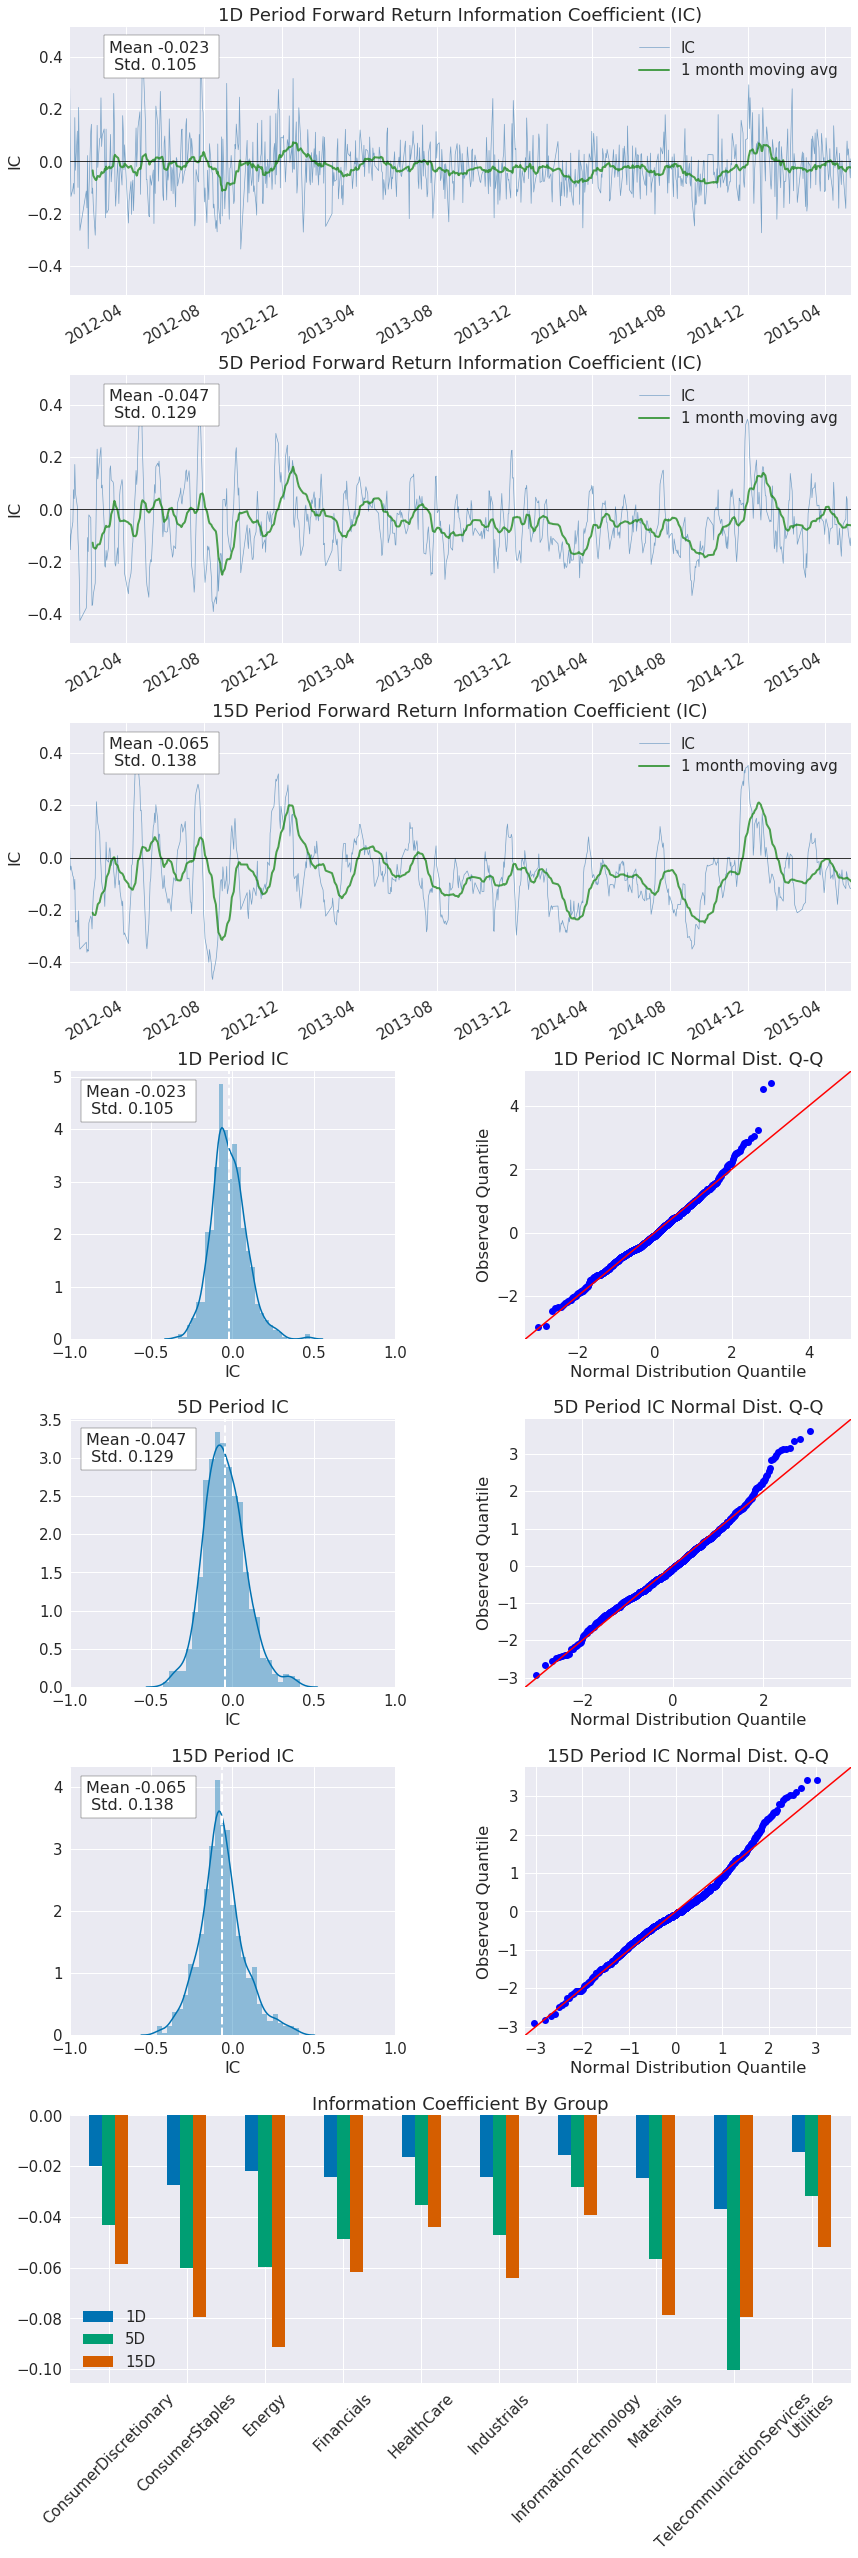

In [17]:
al.tears.create_information_tear_sheet(factor_data,by_group=True)

Turnover Analysis


,15D,1D,5D
Quantile 1 Mean Turnover,0.086,0.021,0.048
Quantile 2 Mean Turnover,0.164,0.042,0.095
Quantile 3 Mean Turnover,0.162,0.040,0.093
Quantile 4 Mean Turnover,0.127,0.031,0.072
Quantile 5 Mean Turnover,0.056,0.013,0.030


,1D,5D,15D
Mean Factor Rank Autocorrelation,0.999,0.997,0.992


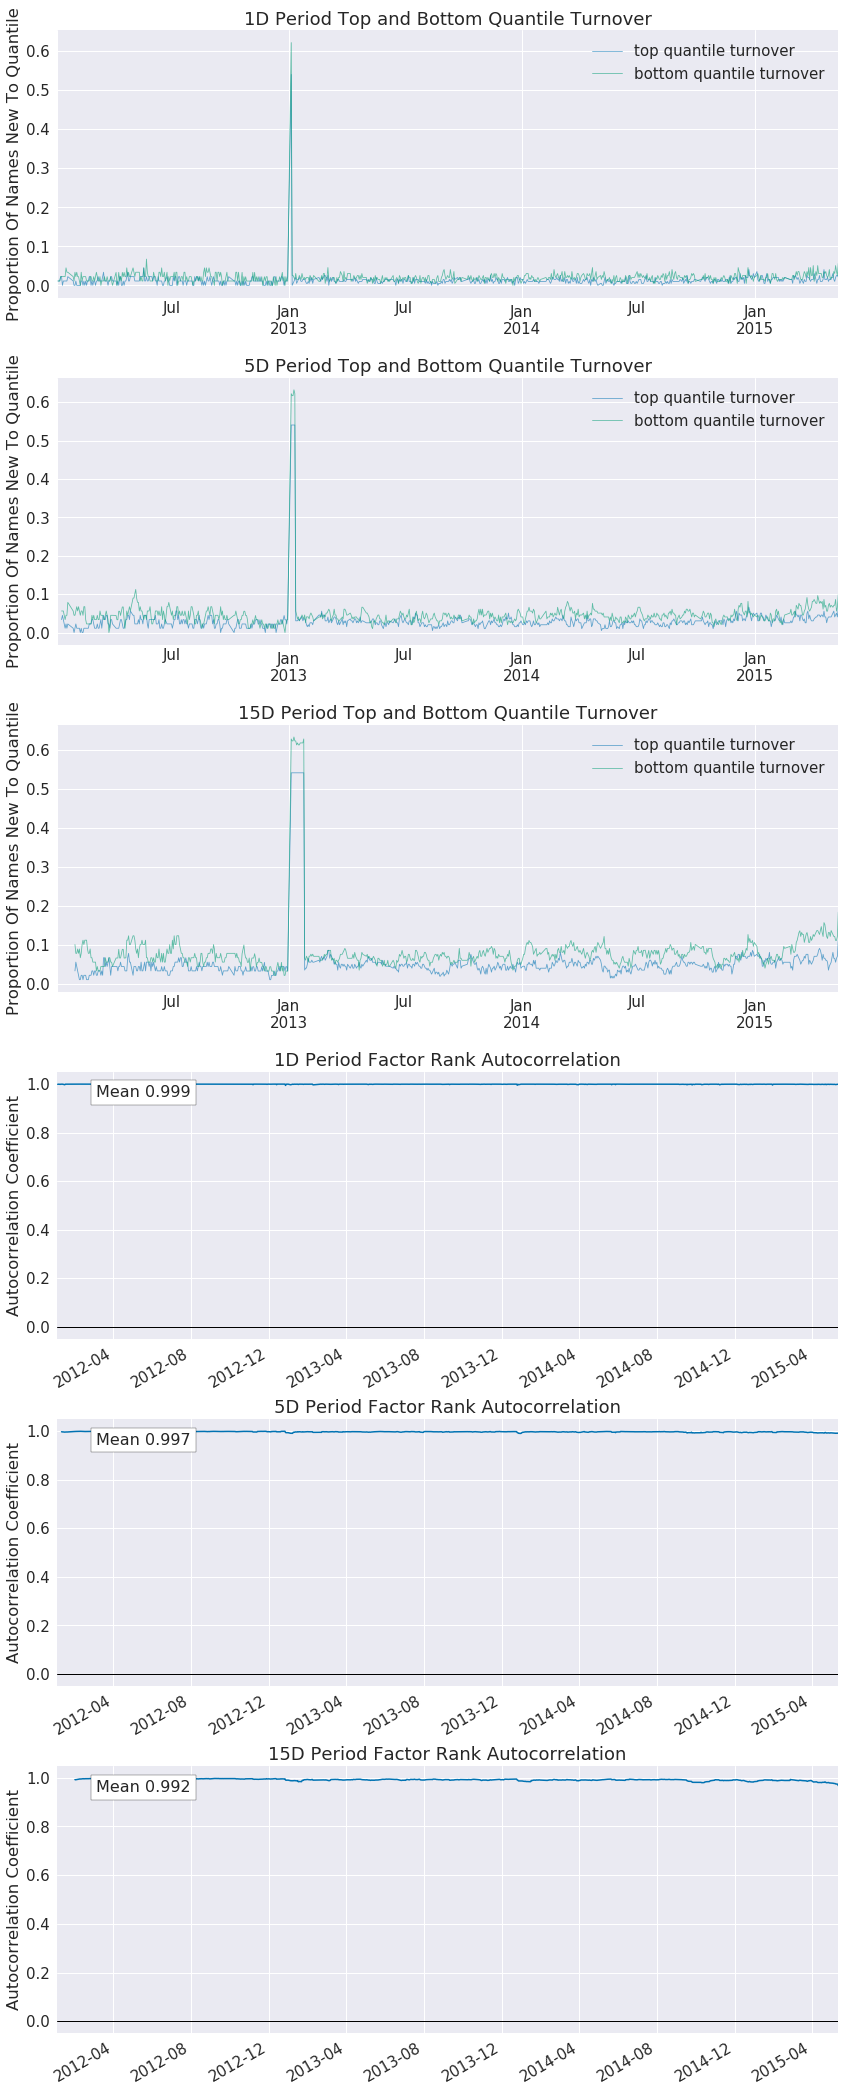

In [18]:
al.tears.create_turnover_tear_sheet(factor_data)

In [1]:
import numpy as np